In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # required for 3D projection to work
%matplotlib inline

In [4]:
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=['sep_len_cm','sep_wid_cm','pet_len_cm','pet_wid_cm'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

sep_len_cm  sep_wid_cm  pet_len_cm  pet_wid_cm species
0         5.1         3.5         1.4         0.2  setosa
1         4.9         3.0         1.4         0.2  setosa
2         4.7         3.2         1.3         0.2  setosa
3         4.6         3.1         1.5         0.2  setosa
4         5.0         3.6         1.4         0.2  setosa

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.drop('species',axis=1))

In [6]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

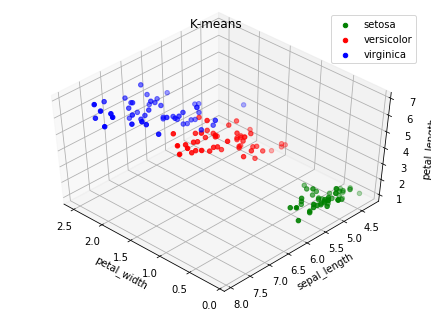

In [7]:
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
dict = {
    "setosa": 'g',
    'versicolor': 'r',
    'virginica': 'b'
}
for name, species in df.groupby('species'):
    ax.scatter(species['pet_wid_cm'], species['sep_len_cm'], species['pet_len_cm'], c=dict[name], label=name)
ax.set_xlabel('petal_width')
ax.set_ylabel('sepal_length')
ax.set_zlabel('petal_length')
ax.set_title('K-means')
ax.legend()
plt.show()

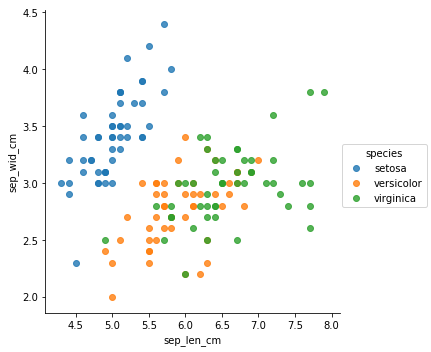

In [8]:
sns.lmplot(x='sep_len_cm', y='sep_wid_cm', data=df, fit_reg=False, hue='species')

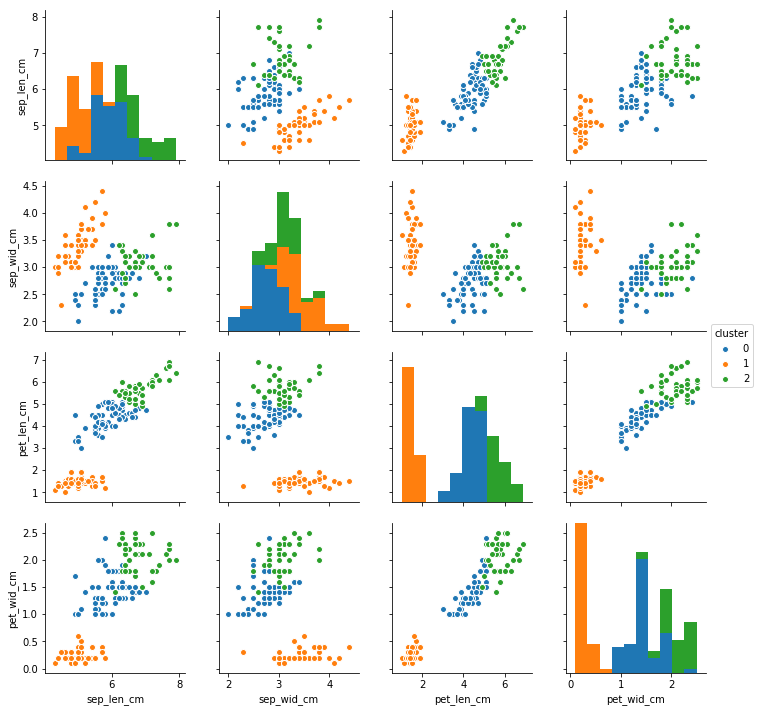

In [9]:
df['cluster'] = kmeans.labels_
sns.pairplot(df.drop('species',axis=1), hue='cluster', vars=['sep_len_cm','sep_wid_cm','pet_len_cm','pet_wid_cm'])